## Graph theory in Julia
#### _Nate Warner_

_Graphs.jl_ is a performant graph theory package written in Julia, it offers

1. Creation of directed and undirected graphs,
2. Algorithms that operate on graphs.

In [353]:
using Pkg
Pkg.add("GraphPlot")
Pkg.add("Graphs")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [354]:
using GraphPlot
using Graphs

## Graph creation
---

The graphs generators that are offered are found on the package [docs](https://juliagraphs.org/Graphs.jl/stable/core_functions/simplegraphs_generators/#Generators-for-common-graphs). We will look at

1. Path graph
1. Simple graph
2. Simple digraph
3. Binary tree

A path graph (or linear graph) is a graph whose vertices can be listed as $v_1, v_2,\ldots,v_n$ with edges $\{v_i, v_{i+1}\}$ for $i = 1,2,\ldots,n-1$. So, a path graph has two terminal vertices with degree one, and all other vertices have degree two.

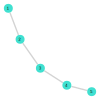

In [81]:
G1 = path_graph(5)
gplot(G1, nodelabel=1:nv(G1))

$G$ has vertices $V = \{1,2,3,4,5\}$ and edges $E = \{\{1,2\}, \{2,3\}, \{3,4\}, \{4,5\}\}$, with $\left\lvert V \right\rvert = 5,\ \left\lvert E \right\rvert = 4$.

A simple graph is a graph with no loops (edges that connect vertices to itself), and all pairs of vertices have at most one edge between them.

The _simple_graph_ function has signature _simple_graph(nv, ne)_ where $nv$ is the number of vertices, and $ne$ is the number of edges. The result is randomly generated.

In [82]:
simple_graph = SimpleGraph(5,4)

{5, 4} undirected simple Int64 graph

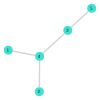

In [80]:
gplot(simple_graph, nodelabel=1:nv(simple_graph))

We can get the sets $V$ and $E$ with _vertices()_ and _edges_().

In [83]:
# Get the sets V and E for the random simple graph
sg_vertices = vertices(simple_graph) |> collect |> println
sg_edges = edges(simple_graph) |> collect

[1, 2, 3, 4, 5]


4-element Vector{Graphs.SimpleGraphs.SimpleEdge{Int64}}:
 Edge 1 => 3
 Edge 3 => 4
 Edge 3 => 5
 Edge 4 => 5

We can also pass our own edge list to make a specific graph, we use the _Edge()_ function to create the edge list.

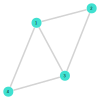

In [110]:
el = Edge.([ (1, 2), (1, 4), (1,3), (2,3), (4,3) ])
simple_graph2 = SimpleGraph(el)
gplot(simple_graph2, nodelabel=1:nv(simple_graph2))

A Simple Digraph is a simple graph with directed edges.

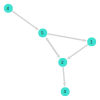

In [117]:
simple_digraph = SimpleDiGraph(5,6)
gplot(simple_digraph, nodelabel=1:nv(simple_digraph))

A Binary Tree is a graph in which all vertices have at most two children. A vertex is a child of a vertex if there is a directed edge connecting them.

In [130]:
bt = binary_tree(3)
bt_vertices = vertices(bt) |> collect |> println
bt_edges = edges(bt) |> collect

[1, 2, 3, 4, 5, 6, 7]


6-element Vector{Graphs.SimpleGraphs.SimpleEdge{Int64}}:
 Edge 1 => 2
 Edge 1 => 3
 Edge 2 => 4
 Edge 2 => 5
 Edge 3 => 6
 Edge 3 => 7

The argument 3 creates a Binary Tree with height 2. The height of a binary tree is the number of edges in the longest path from the root to a leaf. A leaf is a vertex with no children.

Notice that $V = \{1,2,3,4,5,6,7\}$, $E = \{\{1,2\}, \{1,3\}, \{2,4\}, \{2,5\}, \{3,6\}, \{3,7\}\}$, $\left\lvert V \right\rvert = 7$, and $\left\lvert E\right\rvert = 6$. The _binary_tree_ function creates _perfect_ binary tree, a binary tree is perfect if all internal nodes have two children, and all leaf nodes are at the same level.

The binary tree is:

<div style="text-align: center;">
  <img src="./figures/bt1.png" alt="My Figure"/>
</div>

## Global graph properties

We have:

1. **nv(g)**: returns the number of vertices in $g$.
2. **ne(g)**: returns the number of edges in $g$
1. **vertices(g)**: returns an iterable object containing all the vertices in $g$.
1. **edges(g)**: returns an iterable object containing all the edges in $g$.
1. **has_vertex(g, v)**: checks whether graph $g$ includes a vertex numbered $v$.
1. **has_edge(g, s, d)**: checks whether graph $g$ includes an edge from the source vertex $s$ to the destination vertex $d$.
1. **has_edge(g, e)**: returns true if there is an edge in $g$ that satisfies $e == f$ for any $f \in \text{edges}(g)$.
1. **has_self_loops(g)**: checks for self-loops in $g$.
1. **is_directed(g)**: checks if $g$ is a directed graph.
1. **eltype(g)**: returns the type of the vertices of $g$.

We use these functions on the simple graph created above, _simple_graph2_.

In [159]:
@show nv(simple_graph2)
@show ne(simple_graph2)
@show(vertices(simple_graph2) |> collect)
@show(edges(simple_graph2) |> collect)
@show(has_vertex(g,2))
@show(has_edge(simple_graph2,1,2))
@show(has_edge(simple_graph2,(1,2)))
@show(has_self_loops(simple_graph2))
@show(is_directed(simple_graph2))
@show(eltype(simple_graph2))

nv(simple_graph2) = 4
ne(simple_graph2) = 5
vertices(simple_graph2) |> collect = [1, 2, 3, 4]
edges(simple_graph2) |> collect = Graphs.SimpleGraphs.SimpleEdge{Int64}[Edge 1 => 2, Edge 1 => 3, Edge 1 => 4, Edge 2 => 3, Edge 3 => 4]
has_vertex(g, 2) = true
has_edge(simple_graph2, 1, 2) = true
has_edge(simple_graph2, (1, 2)) = true
has_self_loops(simple_graph2) = false
is_directed(simple_graph2) = false
eltype(simple_graph2) = Int64


Int64

## Inneighbors and Outneighbors
___
Inneighbors of a vertex $v$ in a directed graph $G$ is the set of all vertices $u$ that point into $v$
$$ N^{-} = \{u\in V:\ (u\to v) \in E\}  $$

Outneighbors of a vertex $v$ in a directed graph $G$ is the set of all vertices that $v$ points into
$$ N^{+} = \{w\in V:\ (v\to w) \in E\} $$

## Vertex properties
---

We have:

1. neighbors(g, v): returns the neighbors of vertex v in an iterable (if g is directed, only outneighbors are returned).
1. all_neighbors(g,v): returns all the neighbors of vertex v (if g is directed, both inneighbors and outneighbors are returned.
1. inneighbors(g,v): return the inneighbors of vertex v (equivalent to neighbors for undirected graphs).
1. outneighbors(g,v): returns the outneighbors of vertex v (equivalent to neighbors for undirected graphs).

## Edge properties
---

We have: 

1. src(e): gives the source vertex $s$ of an edge $(s, d)$.
1. dst(e): gives the destination vertex $d$ of an edge $(s, d)$.
1. reverse(e): creates a new edge $(d, s)$ from edge $(s, d)$.

In [191]:
e = Edge(1,2)
@show src(e)
@show dst(e)
re = reverse(e)

src(e) = 1
dst(e) = 2


Edge 2 => 1

In [197]:
sg_e = (edges(simple_graph2) |> collect)[1]
@show src(sg_e)
@show dst(sg_e)

src(sg_e) = 1
dst(sg_e) = 2


2

## Modifying graphs
---

We have:

1. add_vertex!(g): adds one vertex to $g$
1. add_vertices!(g, n): adds $n$ vertices to $g$
1. add_edge!(g, s, d): adds the edge $(s, d)$ to $g$
1. rem_vertex!(g, v): removes vertex $v$ from $g$
1. rem_edge!(g, s, d): removes edge $(s, d)$ from $g$

We can create an empty graph with _Graph()_, and an empty digraph with _DiGraph()_, then add or remove vertices and edges with the above functions.

In [275]:
dg = DiGraph{Int32}()
@show vertices(dg) |> collect |> println
@show edges(dg) |> collect |> println
println("------------------------------------------------------")

# Add vertices
add_vertices!(dg, 3)
add_vertex!(dg)
@show vertices(dg) |> collect

Int32[]
(vertices(dg) |> collect) |> println = nothing
Graphs.SimpleGraphs.SimpleEdge{Int32}[]
(edges(dg) |> collect) |> println = nothing
------------------------------------------------------
vertices(dg) |> collect = Int32[1, 2, 3, 4]


4-element Vector{Int32}:
 1
 2
 3
 4

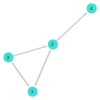

In [338]:
add_edge!(dg, 1,2)
add_edge!(dg,1,3)
add_edge!(dg,3,1)
add_edge!(dg,2,1)
add_edge!(dg, 3,2)
gplot(dg, nodelabel=1:nv(dg))

## Graph traversal
---

We can perform a Breadth first traversal of a graph $g$ at starting vertex $s$ with _bfs_parents(g, s)_, returns a vector of parent vertices indexed by vertex.

In [294]:
bfs_p = bfs_parents(dg, 1)

4-element Vector{Int32}:
 1
 1
 1
 2

We can perform a Depth first traversal of a graph $g$ at starting vertex $s$ with _dfs_tree(g, s)_, returns a vector of parent vertices indexed by vertex.

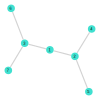

In [297]:
gplot(bt, nodelabel=1:nv(bt))

In [306]:
bt_p = dfs_parents(bt,1)

7-element Vector{Int64}:
 1
 1
 1
 2
 2
 3
 3

The return vector is the parent-pointer indexed by vertex, not by visit order. The parent table of the graph $bt$ is 

$$
\begin{array}{c|ccccccc}
\text{Parent} & 1 & 1 & 1 & 2 & 2 & 3 & 3 \\
\hline
\text{Vertex} &1 & 2 & 3 & 4 &  5& 6 & 7
\end{array}
$$

Notice that the order of the parent vertices is precicesly the returned vector of the Depth First Search.

We can use the returned vector to observe the parents of each vertex. For example,

In [299]:
bt_p[5]

2

tells us that the vertex labeled 5 has parent 2.

If we need a path from a vertex to the root, for example in a Binary Tree, we can call _bfs_parents_ starting at the root, like we did above, then use the returned vector to retrieve the path.

In [327]:
function path_to_root(parents, start)
    path = [start]
    curr = start
    while (parents[curr] != curr) 
        curr = parents[curr]
        push!(path, curr)
    end
    join(path, "->")
end

path_to_root (generic function with 1 method)

In [328]:
path_to_root(bt_p, 5)

"5->2->1"

We can also use _bfs_tree(g,s)_ and _dfs_tree(g,s)_ to perform a traversal of a graph and get returned a directed acyclic graph of vertices in the order they were discovered.

In [343]:
@show is_cyclic(dg)
dg_no_cycles = dfs_tree(dg,1)
@show is_cyclic(dg_no_cycles)

is_cyclic(dg) = true
is_cyclic(dg_no_cycles) = false


false

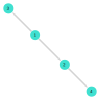

In [339]:
gplot(dg_no_cyles, nodelabel=1:nv(dg_no_cyles))

We can perform a Topological sort of a Directed Acyclic Graph with _topological_sort()_. A topological sort of a directed graph is an ordering of its vertices such that for every directed edge $u \to v,\ u$ appears before $v$ in the ordering.

In [349]:
other = topological_sort(dg_no_cycles)

4-element Vector{Int32}:
 1
 2
 4
 3

We can check if there exists a path between two vertices with _has_path(g,u,v)_.

In [352]:
@show has_path(dg_no_cycles, 3,4)
@show has_path(dg_no_cycles, 1,4)

has_path(dg_no_cycles, 3, 4) = false
has_path(dg_no_cycles, 1, 4) = true


true